In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv("data/heart.csv")

def assistant_command(command):
    command = command.lower()
    
    if "missing" in command:
        print("Missing values in each column:")
        print(df.isnull().sum())
        
    elif "shape" in command:
        print("Dataframe shape:", df.shape)
        
    elif "correlation" in command:
        plt.figure(figsize=(10,6))
        sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
        plt.title("Correlation Heatmap")
        plt.show()
        
    elif "histogram" in command:
        parts = command.split("histogram of")
        if len(parts) > 1:
            col = parts[1].strip()
            if col in df.columns:
                plt.figure(figsize=(8,5))
                sns.histplot(df[col], kde=True)
                plt.title(f"Histogram of {col}")
                plt.show()
            else:
                print(f"Column '{col}' not found in dataset.")
        else:
            print("Please specify column for histogram, e.g. 'histogram of age'")
            
    else:
        print("Sorry, I didn't understand the command."

_IncompleteInputError: incomplete input (313589914.py, line 40)

In [3]:
assistant_command("correlation")

NameError: name 'assistant_command' is not defined

In [192]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

%matplotlib inline

# Load the dataset
df = pd.read_csv("data/heart.csv")

# Prepare features and label
X = df.drop('condition', axis=1)
y = df['condition']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = None  # Global model variable

def assistant_command(command):
    command = command.lower()

    if "missing" in command:
        print("Missing values in each column:")
        print(df.isnull().sum())

    elif "shape" in command:
        print("Dataframe shape:", df.shape)

    elif "correlation" in command:
        plt.figure(figsize=(10,6))
        sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
        plt.title("Correlation Heatmap")
        plt.show()

    elif "histogram" in command:
        parts = command.split("histogram of")
        if len(parts) > 1:
            col = parts[1].strip()
            if col in df.columns:
                plt.figure(figsize=(8,5))
                sns.histplot(df[col], kde=True)
                plt.title(f"Histogram of {col}")
                plt.show()
            else:
                print(f"Column '{col}' not found in dataset.")
        else:
            print("Please specify column for histogram, e.g. 'histogram of age'")

    elif "train model" in command:
        global model
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, y_train)
        print("Model trained successfully!")

    elif "model accuracy" in command:
        if model:
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            print(f"Model Accuracy: {acc:.2f}")
        else:
            print("Please train the model first using 'train model' command.")

    elif "confusion matrix" in command:
        if model:
            from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
            y_pred = model.predict(X_test)
            cm = confusion_matrix(y_test, y_pred)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm)
            disp.plot(cmap="Blues")
            plt.title("Confusion Matrix")
            plt.show()
        else:
            print("Please train the model first using 'train model' command.")

    else:
        print("Sorry, I didn't understand the command.")


              
       


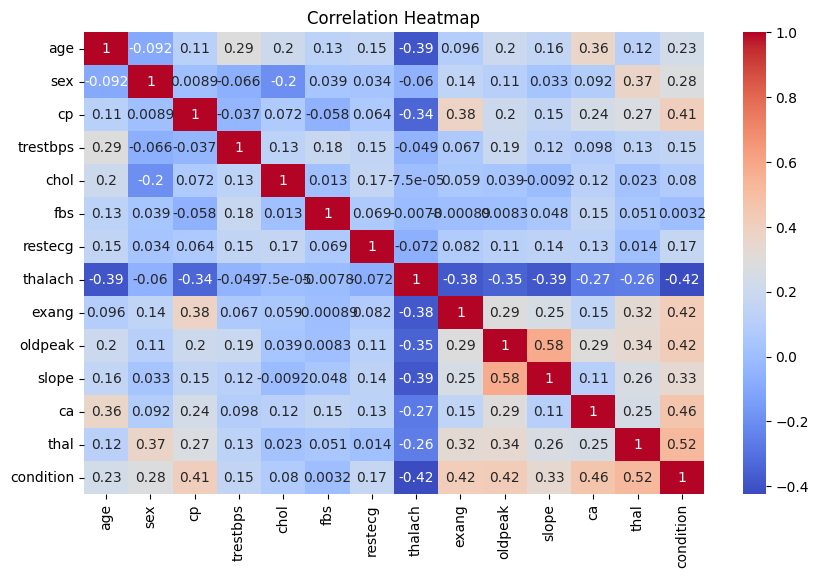

In [32]:
assistant_command("correlation")

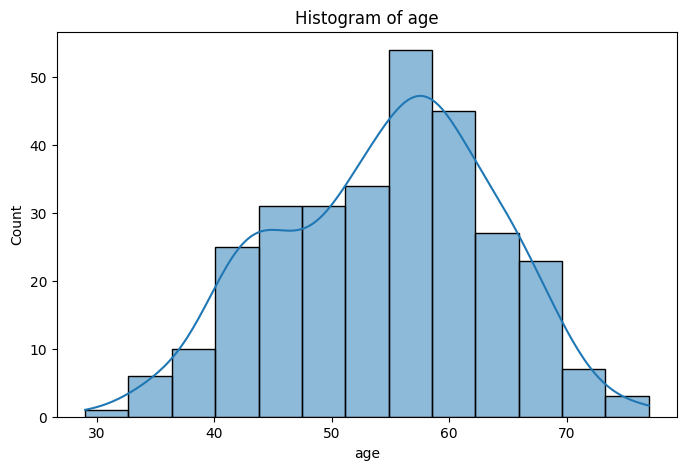

In [33]:
assistant_command("histogram of age")

In [100]:
assistant_command("missing values")

Missing values in each column:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [35]:
assistant_command("shape")

Dataframe shape: (297, 14)


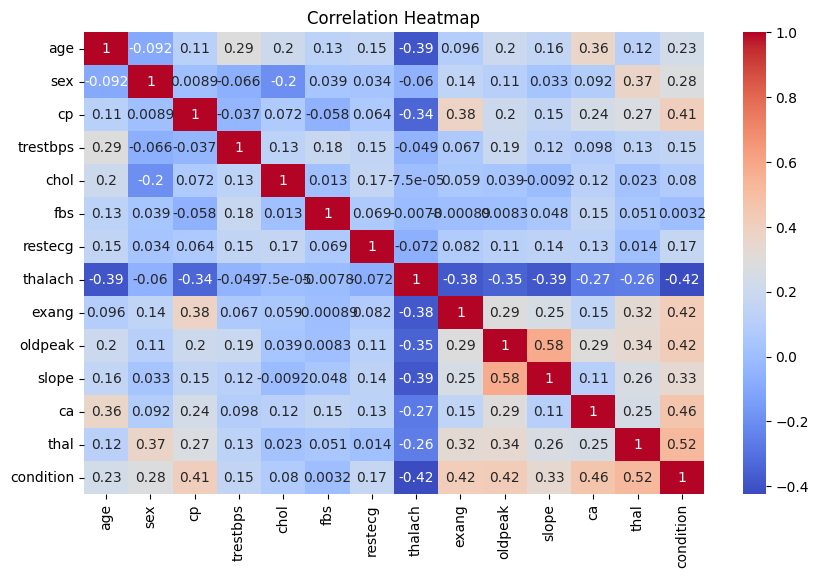

In [36]:
assistant_command("correlation")

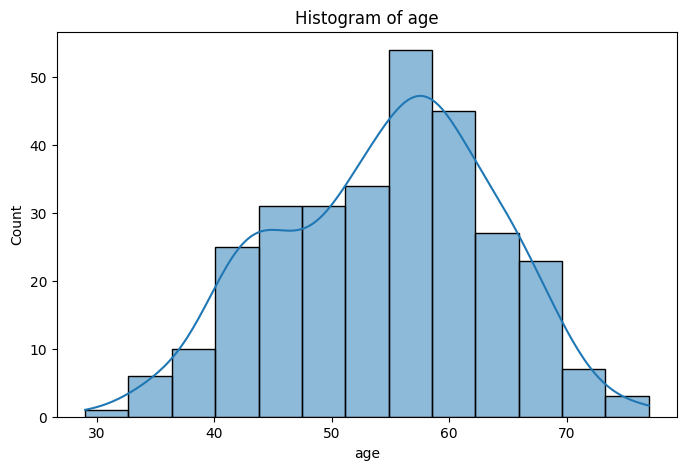

In [37]:
assistant_command("histogram of age")

In [101]:
assistant_command("train model")

Model trained successfully!


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data preparation
X = df.drop('condition', axis=1)
y = df['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prediction and accuracy
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7333333333333333


In [54]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

Confusion Matrix:
 [[23  9]
 [ 7 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [102]:
assistant_command("model accuracy")

Model Accuracy: 0.73


In [194]:
assistant_command("train model")

Model trained successfully!


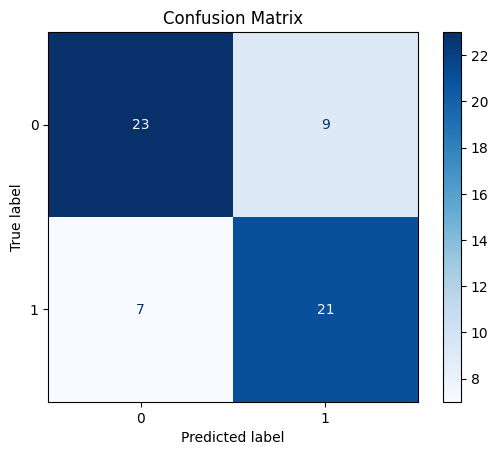

In [195]:
assistant_command("confusion matrix")

In [ ]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Load dataset and train model (same as before)
df = pd.read_csv("data/heart.csv")
X = df.drop("condition", axis=1)
y = df["condition"]
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Create Tkinter window
app = tk.Tk()
app.title("Heart Disease Predictor")
app.geometry("400x600")

# Labels and Entries for each feature
features = list(X.columns)
entries = {}

for i, feature in enumerate(features):
    label = tk.Label(app, text=feature)
    label.grid(row=i, column=0, padx=10, pady=5, sticky='w')
    entry = tk.Entry(app)
    entry.grid(row=i, column=1, padx=10, pady=5)
    entries[feature] = entry

# Prediction function
def predict():
    try:
        # Read values from entries
        values = []
        for feature in features:
            val = float(entries[feature].get())
            values.append(val)

        # Make prediction
        pred = model.predict([values])[0]
        result = "Heart Disease Detected" if pred == 1 else "No Heart Disease"

        messagebox.showinfo("Prediction Result", result)
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numeric values for all features.")

# Predict Button
predict_btn = tk.Button(app, text="Predict", command=predict, bg="blue", fg="white")
predict_btn.grid(row=len(features), column=0, columnspan=2, pady=20)

app.mainloop()
